# 국내 COVID-19 사망자 시계열 분석

In [1]:
from dateutil.parser import parse
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.tsa.api as tsa
import itertools

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('korea_covid.xlsx', skiprows = [0, 1, 2, 3])
df

,일자,계(명),국내발생(명),해외유입(명),사망(명),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,누적(명),489484,473527,15957,4019.5,NaN,NaN,NaN,NaN,NaN
1,2020-01-20 00:00:00,1,-,1,-,NaN,NaN,NaN,NaN,NaN
2,2020-01-21 00:00:00,0,-,-,-,NaN,NaN,NaN,NaN,NaN
3,2020-01-22 00:00:00,0,-,-,-,NaN,NaN,NaN,NaN,NaN
4,2020-01-23 00:00:00,0,-,-,-,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
685,2021-12-04 00:00:00,5352,5327,25,70,NaN,NaN,NaN,NaN,NaN
686,2021-12-05 00:00:00,5126,5103,23,43,NaN,NaN,NaN,NaN,NaN
687,2021-12-06 00:00:00,4324,4295,29,41,NaN,NaN,NaN,NaN,NaN
688,2021-12-07 00:00:00,4954,4924,30,64,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['일자', '계(명)', '국내발생(명)', '해외유입(명)', '사망(명)', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], inplace=True)

In [5]:
df

,일자,계(명),국내발생(명),해외유입(명),사망(명)
0,누적(명),489484,473527,15957,4019.5
1,2020-01-20 00:00:00,1,-,1,-
2,2020-01-21 00:00:00,0,-,-,-
3,2020-01-22 00:00:00,0,-,-,-
4,2020-01-23 00:00:00,0,-,-,-
...,...,...,...,...,...
685,2021-12-04 00:00:00,5352,5327,25,70
686,2021-12-05 00:00:00,5126,5103,23,43
687,2021-12-06 00:00:00,4324,4295,29,41
688,2021-12-07 00:00:00,4954,4924,30,64


In [6]:
df['국내발생(명)'].replace({'-':0}, inplace=True)

In [7]:
df['해외유입(명)'].replace({'-':0}, inplace=True)

In [8]:
df['사망(명)'].replace({'-':0}, inplace=True)

In [9]:
df.drop(index=0, inplace=True)
df

,일자,계(명),국내발생(명),해외유입(명),사망(명)
1,2020-01-20 00:00:00,1,0,1,0.0
2,2020-01-21 00:00:00,0,0,0,0.0
3,2020-01-22 00:00:00,0,0,0,0.0
4,2020-01-23 00:00:00,0,0,0,0.0
5,2020-01-24 00:00:00,1,0,1,0.0
...,...,...,...,...,...
685,2021-12-04 00:00:00,5352,5327,25,70.0
686,2021-12-05 00:00:00,5126,5103,23,43.0
687,2021-12-06 00:00:00,4324,4295,29,41.0
688,2021-12-07 00:00:00,4954,4924,30,64.0


Text(0, 1, '사망자(명)')

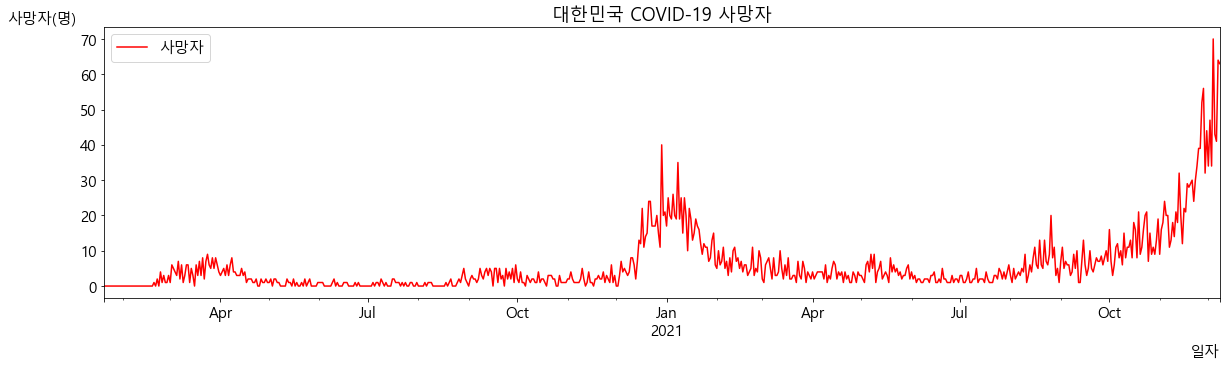

In [10]:
df.plot(x='일자', y='사망(명)', title='대한민국 COVID-19 사망자', color='r', figsize=(20, 5), label='사망자')
plt.legend(loc='upper left')
plt.xlabel('일자', loc = 'right')
plt.ylabel('사망자(명)', rotation=0, loc='top')

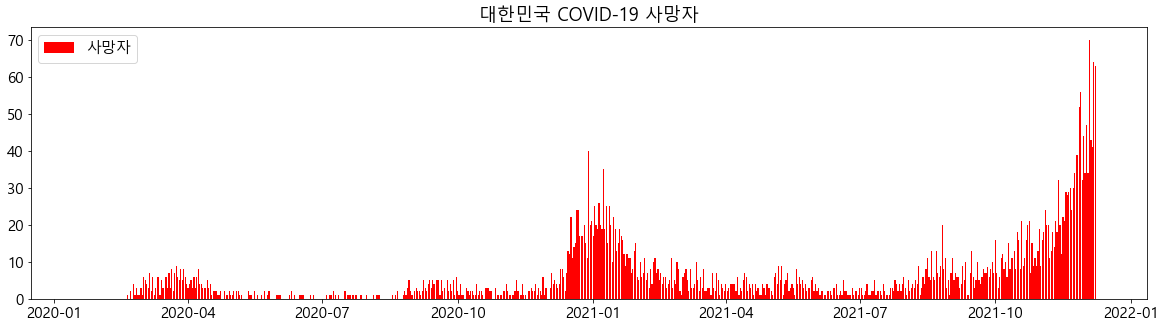

In [11]:
plt.figure(figsize=(20, 5))
plt.title('대한민국 COVID-19 사망자')
plt.bar(df['일자'], df['사망(명)'], label='사망자', color='red')
plt.legend(ncol=1);

In [12]:
df_time = pd.pivot_table(data = df, index = '일자', values = '사망(명)', aggfunc = 'sum')
df_time.head()

,사망(명)
일자,
2020-01-20,0.0
2020-01-21,0.0
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0


In [13]:
y = df_time['사망(명)'].resample('1D').mean()

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.show()

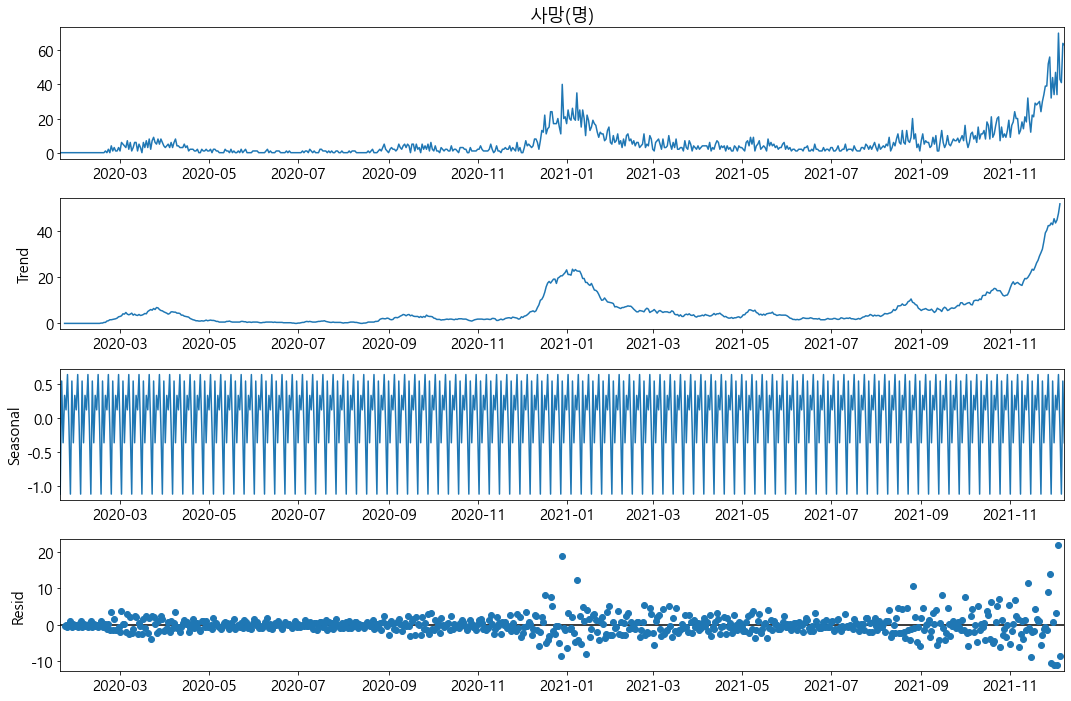

In [15]:
ms = tsa.seasonal_decompose(y, model='additive')
fig = ms.plot()

In [16]:
p = d = q =range (0, 2)
pdq = list(itertools.product(p, d, q))
season_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [17]:
season_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [19]:
p_list = []
p_season_list = []
results_AIC_list = []

In [20]:
for param in pdq:
    for p_season in season_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,order = param,
                                        seasonal_order = p_season,
                                        enforce_stationarity = False,
                                        enforce_inveribility = False)
            results = mod.fit()
            p_list.append(param)
            p_season_list.append(p_season)
            results_AIC_list.append(results.aic)
        except:
            continue

In [21]:
ARIMA_list = pd.DataFrame({'Parameter':p_list,'Seasonal':p_season_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [22]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",3575.689522
47,"(1, 0, 1)","(1, 1, 1, 12)",3577.682990
59,"(1, 1, 1)","(0, 1, 1, 12)",3580.615245
27,"(0, 1, 1)","(0, 1, 1, 12)",3586.288177
63,"(1, 1, 1)","(1, 1, 1, 12)",3587.678932
...,...,...,...
18,"(0, 1, 0)","(0, 1, 0, 12)",4251.636736
9,"(0, 0, 1)","(0, 0, 1, 12)",4397.607261
1,"(0, 0, 0)","(0, 0, 1, 12)",4702.539580
8,"(0, 0, 1)","(0, 0, 0, 12)",4709.104629


In [23]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              사망(명)   No. Observations:                  689
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1788.839
Date:                            Sun, 12 Dec 2021   AIC                           3587.679
Time:                                    20:38:37   BIC                           3610.155
Sample:                                01-20-2020   HQIC                          3596.390
                                     - 12-08-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1262      0.039     -3.226      0.001      -0.203      -0.050
ma.L1         -0.6691      0.026   

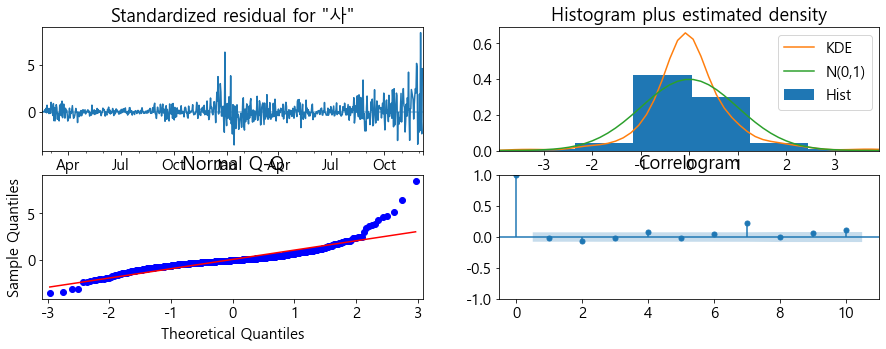

In [24]:
results.plot_diagnostics(figsize=(15, 5));

In [28]:
results.get_prediction();

In [37]:
y.head()

일자
2020-01-20    0.0
2020-01-21    0.0
2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
Freq: D, Name: 사망(명), dtype: float64

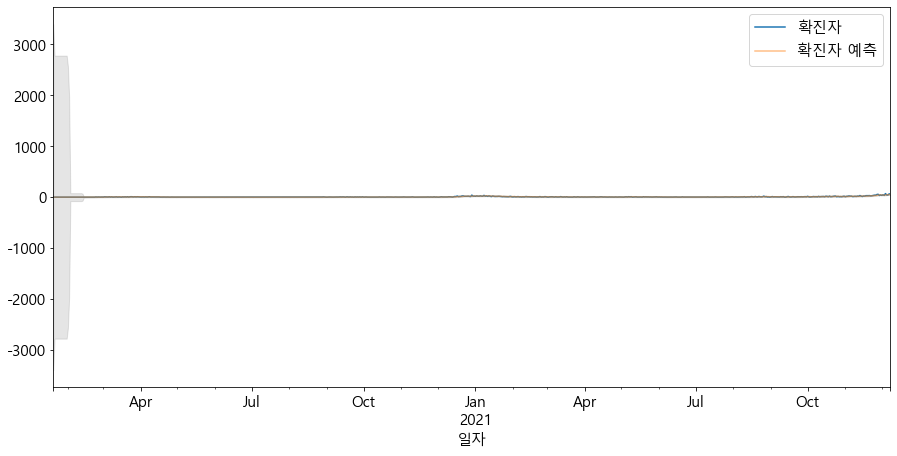

In [30]:
prediction = results.get_prediction(start=pd.to_datetime('2020-01-20'), dynamic=False)
prediction_c = prediction.conf_int()

ax = y.plot(label='사망자')
prediction.predicted_mean.plot(ax=ax, label='사망자 예측', alpha=.5, figsize=(15, 7))
ax.fill_between(prediction_c.index,prediction_c.iloc[:, 0],prediction_c.iloc[:, 1], color='k', alpha=.1)

plt.legend();

In [31]:
prediction = results.get_prediction(start=pd.to_datetime('2020-01-20'), dynamic=False)
pd.DataFrame(prediction.predicted_mean).reset_index();

In [32]:
y_forecast = prediction.predicted_mean
y_truth = y['2020-01-20':]
mse = ((y_forecast - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 12.15


In [33]:
prediction_u = results.get_forecast(steps=100)

In [34]:
prediction_u.predicted_mean

2021-12-09    55.963421
2021-12-10    58.129637
2021-12-11    55.315166
2021-12-12    57.259393
2021-12-13    55.199907
                ...    
2022-03-14    77.037185
2022-03-15    77.253301
2022-03-16    78.245650
2022-03-17    76.821675
2022-03-18    78.152737
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

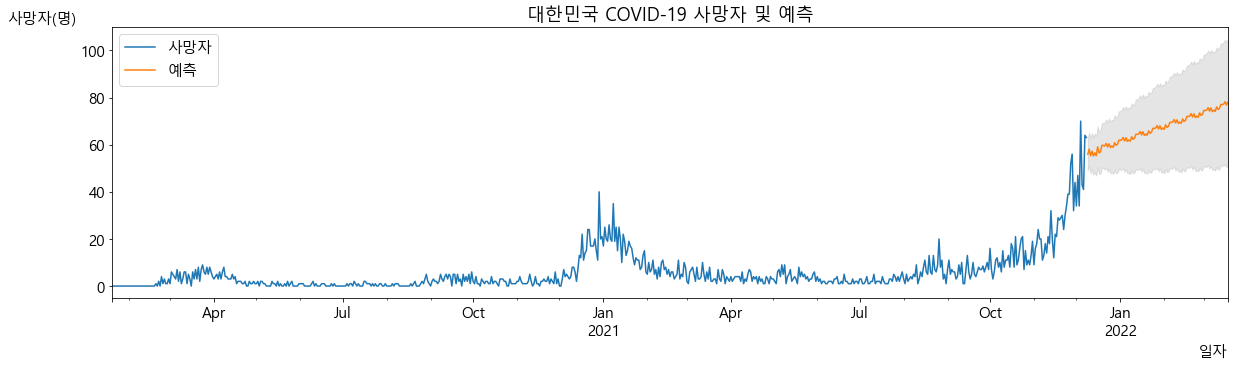

In [39]:
prediction_u = results.get_forecast(steps=100)
prediction_c = prediction_u.conf_int()
ax = y.plot(label='사망자', figsize=(20, 5))
prediction_u.predicted_mean.plot(ax=ax, label='예측')
ax.fill_between(prediction_c.index,
                 prediction_c.iloc[:, 0],
                 prediction_c.iloc[:, 1], color='grey', alpha=.2)

plt.title('대한민국 COVID-19 사망자 및 예측')
plt.legend(loc='upper left')
plt.xlabel('일자', loc = 'right')
plt.ylabel('사망자(명)', rotation=0, loc='top')

plt.savefig('국내 사망자 및 예측.png', dpi=100);